In [53]:
import sys, os
from pymongo import MongoClient

from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

# https://stackoverflow.com/questions/41323423/plotly-inside-jupyter-notebook-python
init_notebook_mode(connected=True) # initiate notebook for offline plot

import pandas as pd
# https://facebook.github.io/prophet/
from fbprophet import Prophet

In [54]:
sys.path.append("..")
import config # ../config.py

# run on raspberrypi3 Mongo database
#config.mongodb_ip = "192.168.1.224"
# run on Asus laptop Mongo database
config.mongodb_ip = "192.168.1.124"

client = MongoClient(host=config.mongodb_ip, port=config.mongodb_port)
db = client['steam']

In [55]:
# appid: 552520 is Fary Cry 5
price_hist_df = pd.DataFrame(list(db['pricehistory'].find({"appid": 552520})))
price_hist_df

,_id,appid,currency,date,discount_percent,final,final_formatted,initial,initial_formatted
0,5b8df9082893176cffcc8f99,552520,USD,2018-09-04 03:16:24.727,0,5999,NaN,5999,NaN
1,5b8f2e6528931773e4bd5770,552520,USD,2018-09-05 01:16:21.679,0,5999,NaN,5999,NaN
2,5b907cf3289317072a4dd5f3,552520,USD,2018-09-06 01:03:47.770,0,5999,NaN,5999,NaN
3,5b93e6b92893170905c171b8,552520,USD,2018-09-08 15:11:53.745,0,5999,NaN,5999,NaN
4,5b97147628931729c9a19a79,552520,USD,2018-09-11 01:03:50.565,0,5999,NaN,5999,NaN
5,5b9859bd2893170d231f3eaa,552520,USD,2018-09-12 00:11:41.577,0,5999,NaN,5999,NaN
6,5b9b0a852893170de4c01188,552520,USD,2018-09-14 01:10:29.063,0,5999,NaN,5999,NaN
7,5b9d5d2028931707a09cdd66,552520,USD,2018-09-15 19:27:28.562,0,5999,NaN,5999,NaN
8,5ba03ddd2893170cc60f1adb,552520,USD,2018-09-17 23:50:53.633,0,5999,NaN,5999,NaN
9,5ba2f95128931711f4d10a18,552520,USD,2018-09-20 01:35:13.919,0,5999,NaN,5999,NaN


In [56]:
# https://plot.ly/python/line-charts/

data = [
    Scatter(
        x=price_hist_df['date'],
        y=price_hist_df['initial'],
        mode = 'lines',
        name = 'Initial Price'
    ),
    Scatter(
        x=price_hist_df['date'],
        y=price_hist_df['final'],
        mode = 'lines',
        name = 'Final Price'
    ),
]

layout = Layout(
        title='Initial and Final Price History For AppID: ' + str(price_hist_df['appid'].unique()[0]),
        xaxis=dict(
            title='Date'
        ),
        yaxis=dict(
            title='Price in Cents (USD)'
        )
    )

fig = Figure(data=data, layout=layout)

iplot(fig)

In [57]:
# https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html
# add "holiday" effects for Steam Sales

steam_summer_sales = pd.DataFrame({
  'holiday': 'steam_summer_sales',
  'ds': pd.to_datetime(['2018-06-21', '2018-06-22', '2018-06-23', '2018-06-24',
                       '2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28',
                       '2018-06-29', '2018-06-30', '2018-07-01', '2018-07-02',
                       '2018-07-03', '2018-07-04', '2018-07-05']),
  'lower_window': 0,
  'upper_window': 0,
})

steam_winter_sales = pd.DataFrame({
  'holiday': 'steam_winter_sales',
  'ds': pd.to_datetime(['2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
                       '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
                       '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31',
                       '2019-01-01', '2019-01-02', '2019-01-03']),
  'lower_window': 0,
  'upper_window': 0,
})

# also known as "autumn sale"
steam_fall_sales = pd.DataFrame({
  'holiday': 'steam_fall_sales',
  'ds': pd.to_datetime(['2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
                       '2018-11-25', '2018-11-26', '2018-11-27']),
  'lower_window': 0,
  'upper_window': 0,
})

steam_halloween_sales = pd.DataFrame({
  'holiday': 'steam_halloween_sales',
  'ds': pd.to_datetime(['2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01']),
  'lower_window': 0,
  'upper_window': 0,
})

#steam_spring_sales = pd.DataFrame({
#  'holiday': 'steam_spring_sales',
#  'ds': pd.to_datetime(['2008-01-13', '']),
#  'lower_window': 0,
#  'upper_window': 0,
#})

steam_lunar_sales = pd.DataFrame({
  'holiday': 'steam_lunar_sales',
  'ds': pd.to_datetime(['2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07',
                       '2019-02-08', '2019-02-09', '2019-02-10', '2019-02-11']),
  'lower_window': 0,
  'upper_window': 0,
})

holidays = pd.concat((steam_summer_sales, steam_winter_sales, steam_fall_sales, steam_halloween_sales, steam_lunar_sales))

In [62]:
to_fit_df = price_hist_df[['date', 'final']]
to_fit_df = to_fit_df.rename(columns={'date': 'ds', 'final': 'y'})

# set a cap based on the max initial price so we don't make predictions above this
# this can change over time, thus not using the max value
to_fit_df['cap'] = price_hist_df['initial']

# https://facebook.github.io/prophet/docs/saturating_forecasts.html
# by default it uses a linear model, we switch this to logistic
m = Prophet(holidays=holidays, growth='logistic')
m.fit(to_fit_df)
future = m.make_future_dataframe(periods=120) # 120 days
# set a cap based on the max initial price so we don't make predictions above this
future['cap'] = max(price_hist_df['initial'])
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,cap
212,2019-08-01 02:49:46.525,5999
213,2019-08-02 02:49:46.525,5999
214,2019-08-03 02:49:46.525,5999
215,2019-08-04 02:49:46.525,5999
216,2019-08-05 02:49:46.525,5999


In [65]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
212,2019-08-01 02:49:46.525,1417.856624,445.424885,2399.465842
213,2019-08-02 02:49:46.525,1170.450582,217.475324,2132.376340
214,2019-08-03 02:49:46.525,923.503111,-90.976135,1899.188390
215,2019-08-04 02:49:46.525,620.045133,-328.982135,1548.009496
216,2019-08-05 02:49:46.525,825.210297,-141.545751,1844.892749


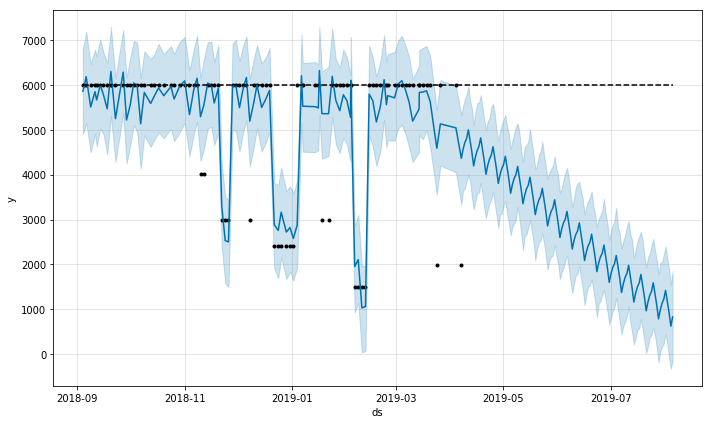

In [66]:
# https://mikulskibartosz.name/prophet-plot-explained-31df79087e24
fig1 = m.plot(forecast)

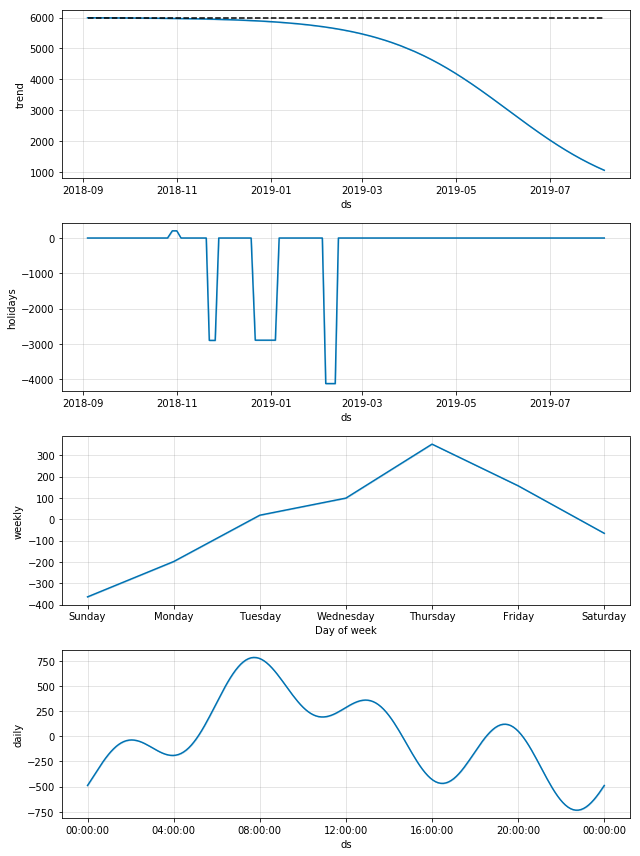

In [67]:
fig2 = m.plot_components(forecast)